In [10]:
import numpy as np
import matplotlib.pyplot as plt

from world_machine_experiments.shared.save_metrics import load_multiple_metrics

In [3]:
metrics = load_multiple_metrics("toy1d_experiment1_configuration_test", "toy1d_metrics")

In [ ]:
metrics["variation10005006674417811341578641675020555456"]

{'normal': {'state_decoded_mse': 0.018044056370854378,
  'state_decoded_0.1sdtw': 0.16638486087322235,
  'measurement_mse': 0.010482306592166424,
  'measurement_0.1sdtw': 0.14786048233509064,
  'optimizer_loss': 0.014263181947171688},
 'use_state': {'state_decoded_mse': 0.045310914516448975,
  'state_decoded_0.1sdtw': 0.2275911122560501,
  'measurement_mse': 0.02920614182949066,
  'measurement_0.1sdtw': 0.24208354949951172,
  'optimizer_loss': 0.03725853189826012},
 'prediction': {'state_decoded_mse': 0.1542283147573471,
  'state_decoded_0.1sdtw': 0.7713853716850281,
  'measurement_mse': 0.10825454443693161,
  'measurement_0.1sdtw': 1.1221593618392944,
  'optimizer_loss': 0.13124142587184906},
 'prediction_shallow': {'state_decoded_mse': 0.31511932611465454,
  'state_decoded_0.1sdtw': 2.2360129356384277,
  'measurement_mse': 0.1902468055486679,
  'measurement_0.1sdtw': 2.605436325073242,
  'optimizer_loss': 0.2526830732822418}}

In [39]:
def get_values(metrics, indexes):
    values = []

    for name in metrics:
        value = metrics[name]

        for index in indexes:
            value = value[index]

        values.append(value)

    return np.array(values)

In [40]:

mse = get_values(metrics, ["means","prediction_shallow","state_decoded_mse"])
sdtw = get_values(metrics, ["means","prediction_shallow","state_decoded_0.1sdtw"])


In [16]:
np.isnan(mse).sum(), np.isnan(sdtw).sum()

(np.int64(79), np.int64(79))

In [23]:
mse_filtered = mse[np.bitwise_not(np.isnan(mse))]
mse_filtered = mse_filtered[mse_filtered<1]

sdtw_filtered = sdtw[np.bitwise_not(np.isnan(sdtw))]
sdtw_filtered = sdtw_filtered[sdtw_filtered<1]


(array([166., 702., 875., 550., 352., 178.,  92.,  41.,  22.,  13.]),
 array([0.11965132, 0.14777051, 0.17588971, 0.2040089 , 0.2321281 ,
        0.26024729, 0.28836648, 0.31648568, 0.34460487, 0.37272407,
        0.40084326]),
 <BarContainer object of 10 artists>)

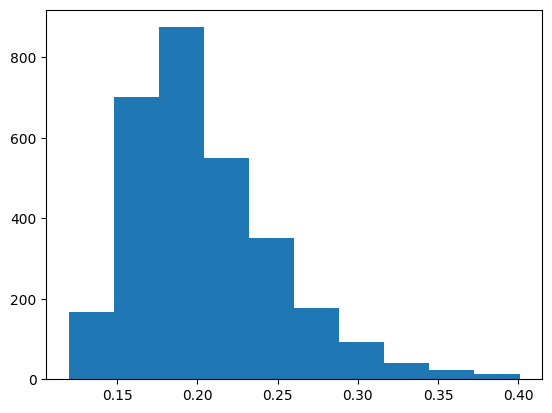

In [24]:
plt.hist(mse_filtered)

(array([  7.,  15.,  45.,  81., 123., 171., 177., 201., 177., 185.]),
 array([0.54205662, 0.5878445 , 0.63363237, 0.67942025, 0.72520813,
        0.770996  , 0.81678388, 0.86257176, 0.90835963, 0.95414751,
        0.99993539]),
 <BarContainer object of 10 artists>)

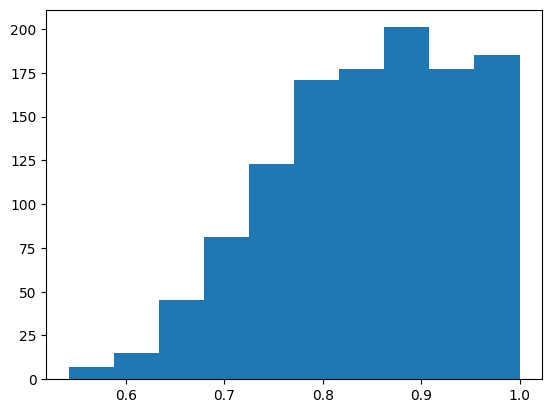

In [25]:
plt.hist(sdtw_filtered)

In [26]:
np.argmin(mse)

np.int64(39)

In [29]:
np.argmin(sdtw)

np.int64(39)

In [27]:
names = list(metrics.keys())

In [28]:
names[39]

'variation103999402397291494474472664593541643945'

In [31]:
train_history = load_multiple_metrics("toy1d_experiment1_configuration_test", "toy1d_train_history")

In [42]:
next(iter(train_history))

'variation10005006674417811341578641675020555456'

In [44]:
optimizer_loss_val = get_values(train_history, ["means", "optimizer_loss_val"])

In [78]:
patience = 6


n_diverge = 0
diverge = []
for patience in range(1, 50):
    patience_diverge = np.zeros(optimizer_loss_val.shape[0], bool)
    for i in range(optimizer_loss_val.shape[0]):
        run_loss = optimizer_loss_val[i]

        best = np.inf
        stuck_count = 0
        for j in range(len(run_loss)):
            if run_loss[j] < best:
                best = run_loss[j]
                stuck_count = 0
            else:
                stuck_count += 1
            
            if stuck_count >= patience:
                patience_diverge[i] = True
                break

    diverge.append(patience_diverge)
diverge = np.array(diverge)
patience = np.array(range(1,50))

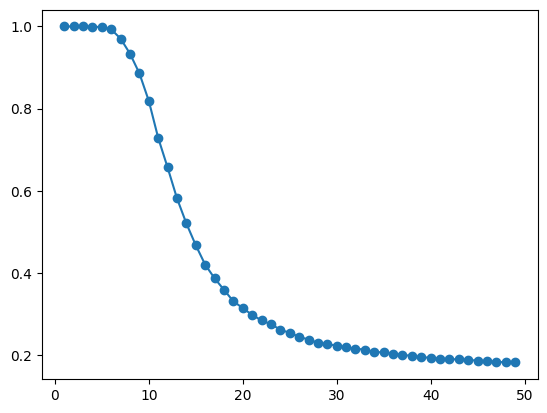

In [82]:
plt.plot(patience, diverge.sum(axis=1)/optimizer_loss_val.shape[0], "o-")